In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
crudoil = pd.read_csv('./dataset/CrudeOilOutput.csv')
crudoil.head()

,WorldOil,USEnergy,USAutoFuelRate,USNuclear,USCoal,USDryGas
0,55.7,74.3,13.4,83.5,598.6,21.7
1,55.7,72.5,13.6,114.0,610.0,20.7
2,52.8,70.5,14.0,172.5,654.6,19.2
3,57.3,74.4,13.8,191.1,684.9,19.1
4,59.7,76.3,14.1,250.9,697.2,19.2


In [3]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

def lm(dep,ind):
    formula

# Feature Selection

> ## StepWise Regression

In [11]:
def pvalues(model):
    return pd.Series(data=[model.pvalues[-1]],index=[model.pvalues.index[-1]])

In [5]:
independent = list(crudoil.keys())[1:]
independent

['USEnergy', 'USAutoFuelRate', 'USNuclear', 'USCoal', 'USDryGas']

### Feature - 1 

In [14]:
for var in independent:
    formula = 'WorldOil~{}'.format(var)
    model = smf.ols(formula,data = crudoil).fit()
    try:   
        pval = pd.concat((pval,pvalues(model)))
    except:
        pval = pvalues(model)
        
pval.sort_values()
print('pvalue of {} is lowest which is {}'.format(pval.index[0],pval[0]))

pvalue of USEnergy is lowest which is 1.8551872323861467e-11


In [18]:
feature1 = pval.index[0]
feature1

'USEnergy'

### Feature - 2

In [20]:
independent.remove(feature1)

In [21]:
independent

['USAutoFuelRate', 'USNuclear', 'USCoal', 'USDryGas']

In [22]:
pval=[]
for var in independent:
    formula = 'WorldOil~USEnergy+{}'.format(var)
    model = smf.ols(formula,data = crudoil).fit()
    try:   
        pval = pd.concat((pval,pvalues(model)))
    except:
        pval = pvalues(model)
        
pval.sort_values()
print('pvalue of {} is lowest which is {}'.format(pval.index[0],pval[0]))

pvalue of USAutoFuelRate is lowest which is 0.0010572329079458042


In [23]:
pval

USAutoFuelRate    0.001057
USNuclear         0.001522
USCoal            0.022730
USDryGas          0.035750
dtype: float64

### Feature -3

In [24]:
independent.remove('USAutoFuelRate')

In [31]:
pval=[]
for var in independent:
    formula = 'WorldOil~USEnergy+USAutoFuelRate+{}'.format(var)
    model = smf.ols(formula,data = crudoil).fit()
    try:   
        pval = pd.concat((pval,pvalues(model)))
    except:
        pval = pvalues(model)

print(pval.sort_values())
print('\n')
print('pvalue of {} is lowest which is {}'.format(pval.sort_values().index[0],pval.sort_values()[0]))

USCoal       0.102247
USDryGas     0.650380
USNuclear    0.672102
dtype: float64


pvalue of USCoal is lowest which is 0.10224701823629695


> "USCoal" ***P-value*** = 0.10224 > 0.05 (significance level)

Hence, don't consider from values
Hence features for crudoil are : 'USEnergy' and 'USAutoFuelRate'

# Backward Elimination 

### Full Model

In [32]:
crudoil.keys()

Index(['WorldOil', 'USEnergy', 'USAutoFuelRate', 'USNuclear', 'USCoal',
       'USDryGas'],
      dtype='object')

In [37]:
formula = 'WorldOil~USEnergy+USAutoFuelRate+USNuclear+USCoal+USDryGas'.format(var)
model = smf.ols(formula,data = crudoil).fit()
model.pvalues.sort_values(ascending=False)

Intercept         0.764250
USDryGas          0.752753
USNuclear         0.514197
USAutoFuelRate    0.196018
USCoal            0.192596
USEnergy          0.000159
dtype: float64

### Drop values for worst pvalue
> dropping *'USDryGas'*

In [38]:
formula = 'WorldOil~USEnergy+USAutoFuelRate+USNuclear+USCoal'.format(var)
model = smf.ols(formula,data = crudoil).fit()
model.pvalues.sort_values(ascending=False)

Intercept         6.380683e-01
USNuclear         5.276771e-01
USCoal            9.579508e-02
USAutoFuelRate    8.628793e-02
USEnergy          2.503312e-09
dtype: float64

### Drop values for worst pvalue
> dropping 'USNuclear'

In [40]:
formula = 'WorldOil~USEnergy+USAutoFuelRate+USCoal'.format(var)
model = smf.ols(formula,data = crudoil).fit()
model.pvalues.sort_values(ascending=False)

USCoal            1.022470e-01
Intercept         2.313101e-02
USAutoFuelRate    4.787754e-03
USEnergy          4.406243e-11
dtype: float64

### Drop values for worst pvalue
> dropping 'USCoal'

In [41]:
formula = 'WorldOil~USEnergy+USAutoFuelRate'.format(var)
model = smf.ols(formula,data = crudoil).fit()
model.pvalues.sort_values(ascending=False)

Intercept         5.380961e-02
USAutoFuelRate    1.057233e-03
USEnergy          2.553766e-11
dtype: float64

### Both the values are significant
Hence, USAutoFuelRate and US Energy are significant feature

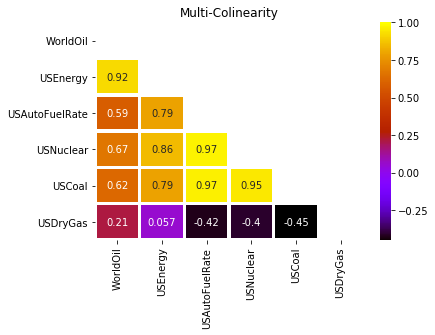

In [49]:
corr = crudoil.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,linewidths=2.5,mask=mask,cmap='gnuplot',annot=True)
plt.title('Multi-Colinearity')
plt.show()

# Stepwise AIC
AIC = Akaike information criterion

In [51]:
from sklearn.linear_model import LinearRegression

In [57]:
model_sk = LinearRegression()

In [58]:
model_sk.fit(crudoil.iloc[:,1:],crudoil.iloc[:,0:1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
from sklearn.feature_selection import RFE

In [71]:
m = RFE(model_sk).fit(crudoil.iloc[:,1:],crudoil.iloc[:,0:1])

C:\Users\srikanth\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [75]:
m.support_

array([ True,  True, False, False, False])